<h3><center>ECE 49500/59500 Machine Learning<center>
<center>Spring 2020<center>
<h2><center>Linear Regresion for House Prices Prediction<center>

Yanan Song

1. Load dataset

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

In [2]:
boston = load_boston(return_X_y = False)
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["target"])
# X = X['RM'] , X['AGE'] ,X['LSTAT']
X = X[['RM', 'AGE', 'LSTAT']]
y = np.array(y)

In [3]:
X.head(10)

,RM,AGE,LSTAT
0,6.575,65.2,4.98
1,6.421,78.9,9.14
2,7.185,61.1,4.03
3,6.998,45.8,2.94
4,7.147,54.2,5.33
5,6.430,58.7,5.21
6,6.012,66.6,12.43
7,6.172,96.1,19.15
8,5.631,100.0,29.93
9,6.004,85.9,17.10


2. Feature Scaling for X

In [4]:
from sklearn.preprocessing import StandardScaler
X_Standardisation = StandardScaler().fit_transform(X) 

In [5]:
X_Standardisation[:10]

array([[ 0.41367189, -0.12001342, -1.0755623 ],
       [ 0.19427445,  0.36716642, -0.49243937],
       [ 1.28271368, -0.26581176, -1.2087274 ],
       [ 1.01630251, -0.80988851, -1.36151682],
       [ 1.22857665, -0.51117971, -1.02650148],
       [ 0.20709638, -0.35115713, -1.04332233],
       [-0.38841095, -0.07022862, -0.03126762],
       [-0.16046556,  0.97880825,  0.91070021],
       [-0.9312059 ,  1.11749449,  2.42177359],
       [-0.39980821,  0.61609042,  0.62334395]])

3.Split dataset into training and testing sets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_Standardisation,y, test_size = 0.3, shuffle = True, random_state = 0)

In [41]:
class GDLinearRegressor():
    """i. Set the parameters such as the learning rate and the number of iteration"""
    def __init__(self, learning_rate = 0.01, max_iter = 2000):
        self.X = X
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w0 = None
        self.w = None
        self.J = None
        
    def fit(self, X_train, y_train):
        """ii. Apply gradient descent to update parameters 𝑤 (initially set them to 0)"""
        n_samples = X_train.shape[0]
        n_features = X_train.shape[1]
        w0 = 0
        w = np.zeros((n_features, 1))
        J = []
        loss = []
        
        for i in range(self.max_iter):
            #hypothesis function
            y_hat = np.dot(X_train,w) + w0
            #calculate loss 
            loss = y_hat - y_train
            #gradient descent, update w
            w = w - self.learning_rate *  X_train.T.dot(loss) / (n_samples)
            w0 = w0 - self.learning_rate * np.sum(loss) /  (n_samples)
            #save all cost
            J.append(np.sum(loss ** 2) / (2 * n_samples))
        """iii. Obtain optimal paramters that minimize the cost function"""
        self.w0 = w0
        self.w = w
        self.J = J
    def predict(self, X_test):
        """i. Multiple the optimized 𝑤 to the test data to get the predicted values"""
        y_pred = []
        for sample in X_test:
            y_pred.append(np.dot(sample, self.w) + self.w0)
        return np.array(y_pred)
            
        
        

In [42]:
clf = GDLinearRegressor()
clf.fit(X_train,y_train)

In [43]:
y_pred = clf.predict(X_test)

5. Plot the cost function versus the number of iteration

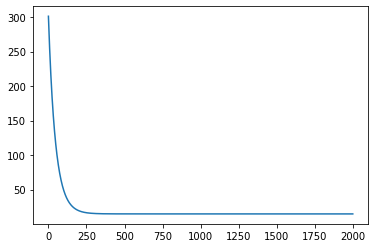

In [45]:
import matplotlib.pyplot as plt
plt.plot(clf.J)
plt.show()

6. Performance evaluation
Compute RMSE (root mean squared error)

In [28]:
import math

def RMSE(y_test, y_pred):
    n_samples = y_test.shape[0]
    return math.sqrt(np.sum((y_test - y_pred) ** 2) / n_samples)
print("RMSE : ", RMSE(y_test, y_pred))

RMSE :  5.746187290559474


Summary

Implement multivariate linear regression algorithm and apply it for house prices prediction.<br>
The Root Mean Square Error is 5.746<br>
Algorithm implementation<br>
1) Calculate hypothesis function<br>
2) Calculate loss <br>
3) apply gradient descent<br>
4) Obtain optimal paramters that minimize the cost function<br>
5) Multiple the optimized 𝑤 to the test data to get the predicted values<br>